In [ ]:
# from drive
!unzip ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip

Archive:  ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip
   creating: dataset/tfrecords/
   creating: dataset/tfrecords/valid/
  inflating: dataset/tfrecords/valid/file_valid_01-2048.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_02-1551.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_00-2048.tfrec  
   creating: dataset/tfrecords/train/
  inflating: dataset/tfrecords/train/file_train_63-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_61-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_60-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_47-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_35-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_54-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_17-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_27-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_45-2048.tfrec  
  inflating: dataset/tfrecords/train/file_trai

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.lines as mlines

In [2]:
import sys
sys.path.append('/content/drive/MyDrive/single-person-pose-estimation')

In [3]:
from configs import default_config as cfg
from model.hourglass import create_hourglass_model
from dataset_builder import DatasetBuilder
from utilities import data_utils, model_utils
from loss import IOU

In [ ]:
ds_builder = DatasetBuilder(cfg)

Train dataset with 66 tfrecords and 134214 examples.
Valid dataset with 3 tfrecords and 5647 examples.


In [ ]:
ds = ds_builder.get_ds_prediction()

In [ ]:
ds_train, ds_valid = ds_builder.build_datasets()

In [4]:
model = create_hourglass_model(cfg.NUM_KEYPOINTS, 
                                4,
                                cfg.HG_NUM_CHANNELS,
                                cfg.IMAGE_SHAPE,
                                cfg.HM_ACTIVATION)

Created Hourglass model:
    1. 4 stacks.
    2. 13784260 parameters. Call model.get_summary() for more detail.
    


In [5]:
model = model_utils.compile_model_from_checkpoint(model,
                                                  '/content/drive/MyDrive/storage/flip fixed/IOU_E80_lr0.001_Adam_sigmoid_4stacks/checkpoints/best_val_loss_weights.ckpt',
                                                  tf.keras.optimizers.Adam(),
                                                  IOU)


In [ ]:
it = iter(ds_valid)

In [ ]:
images_batch, heatmaps_batch = next(it)

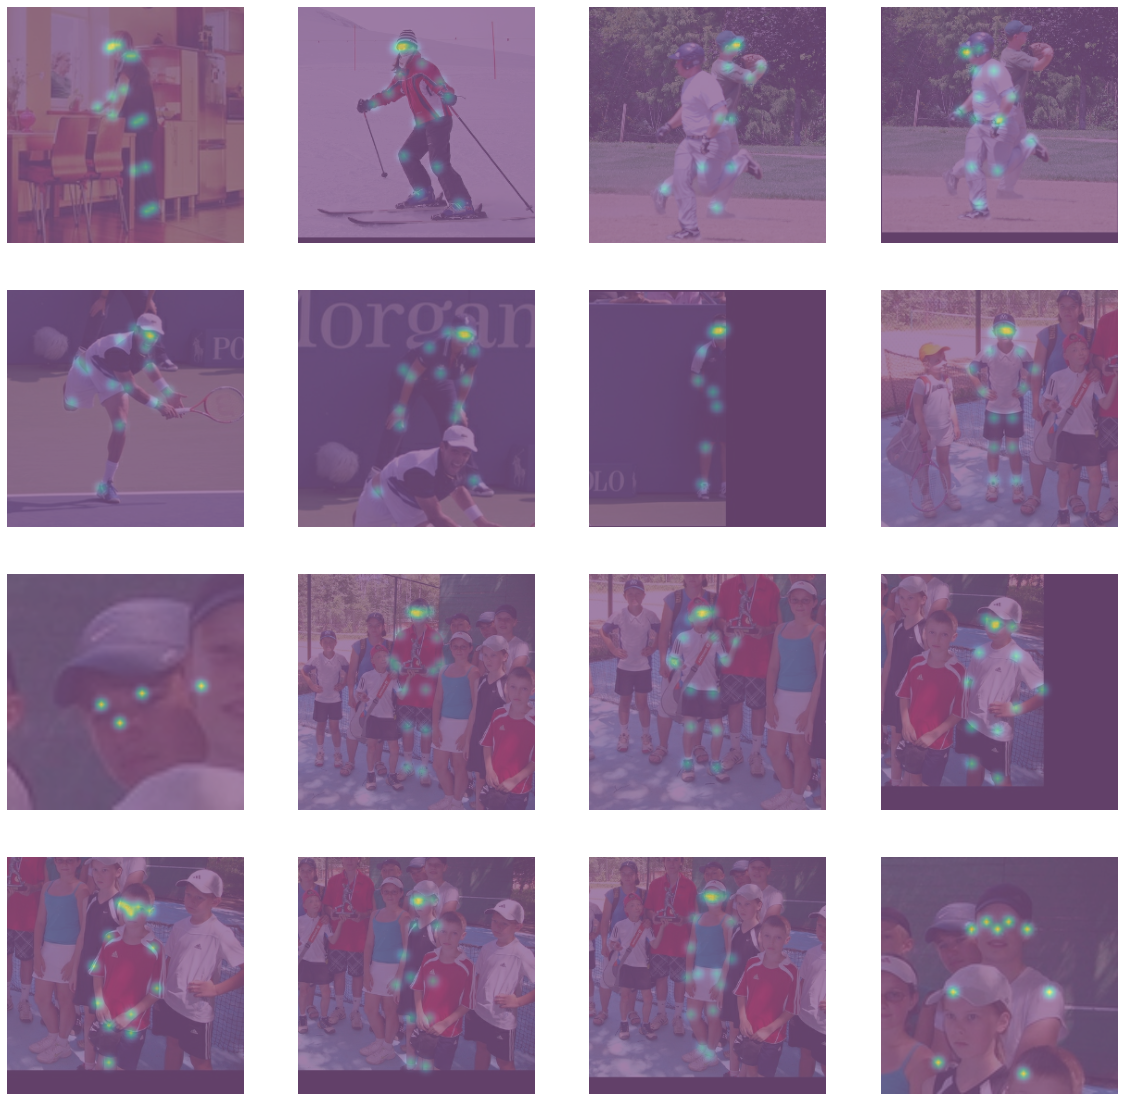

In [ ]:
#Truth ground
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    h = tf.image.resize(heatmaps_batch[i], (256, 256))
    plt.imshow(tf.reduce_sum(h, axis = -1), alpha = 0.5)
    plt.axis("off")

In [ ]:
pred = model.predict(images_batch)

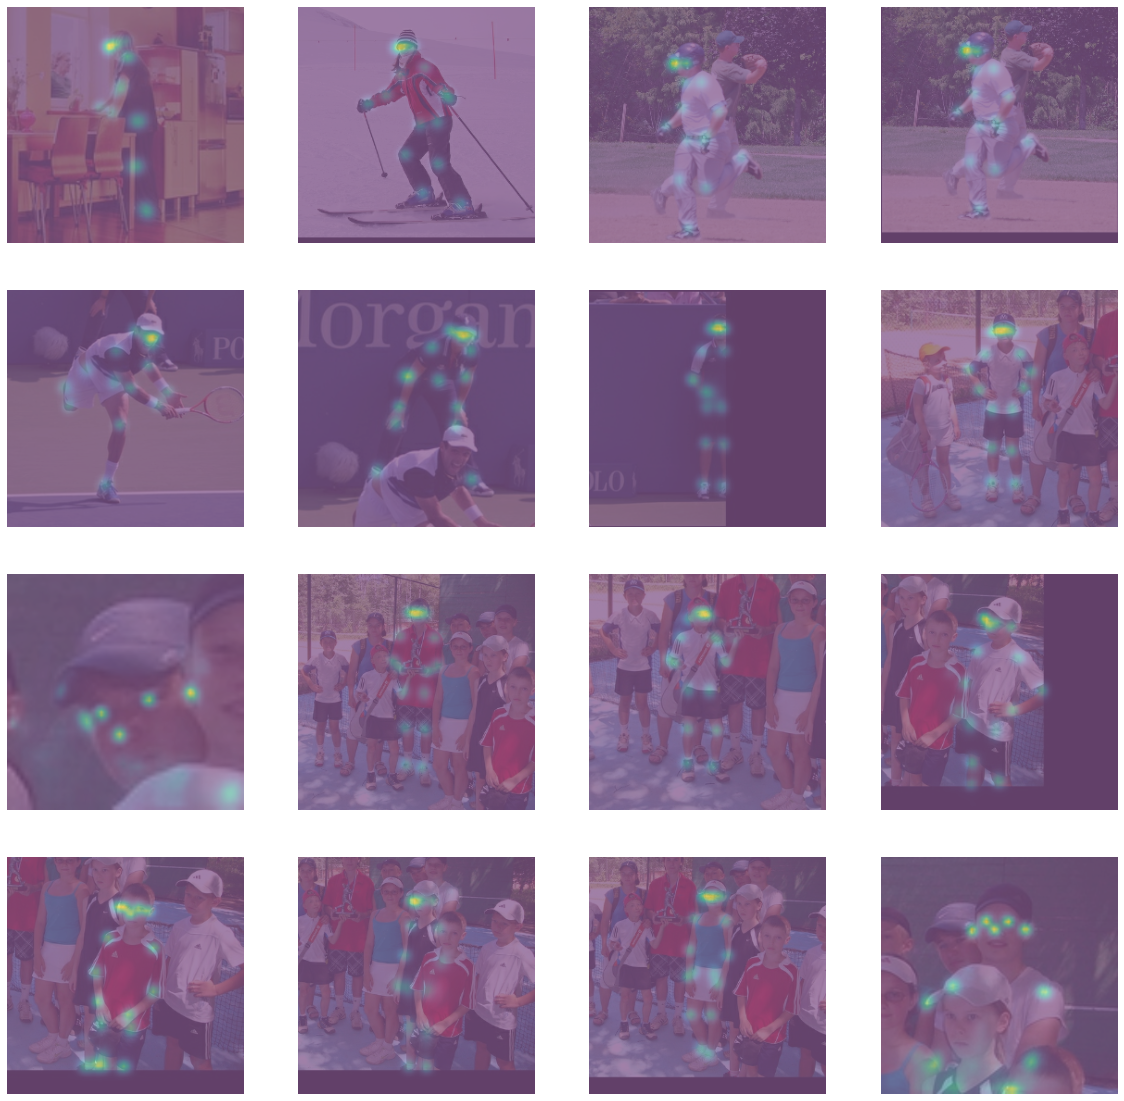

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    p = tf.image.resize(pred[-1][i], (256,256))
    plt.imshow(tf.reduce_sum(p, axis = -1), alpha = 0.5)
    plt.axis("off")



---



---

discard below


Text(0.5, 1.0, 'Predicted heatmaps')

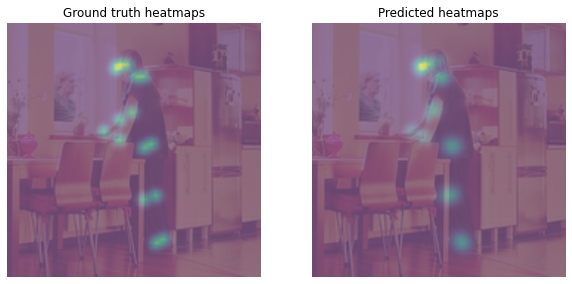

In [ ]:
i = 0
img = images_batch[i]
hms_gt = heatmaps_batch[i]
hms_pred = pred[-1][i]
fig = plt.figure(figsize=(10, 7))
rows = 1
cols = 2

fig.add_subplot(rows, cols, 1)
plt.imshow(img, cmap = 'gray', alpha = 0.5)
hms_gt = tf.image.resize(hms_gt, (256,256))
plt.imshow(tf.reduce_sum(hms_gt, axis = -1)/17, alpha = 0.5)
plt.axis('off')
plt.title('Ground truth heatmaps')

fig.add_subplot(rows, cols, 2)
plt.imshow(img, cmap = 'gray', alpha = 0.5)
hms_pred = tf.image.resize(hms_pred, (256,256))
plt.imshow(tf.reduce_sum(hms_pred, axis = -1)/17, alpha = 0.5)
plt.axis('off')
plt.title('Predicted heatmaps')


In [ ]:
gt_keypoints = data_utils.heatmaps_to_keypoints_v2(hms_gt.numpy(), 0.1)
pred_keypoints = data_utils.heatmaps_to_keypoints_v2(hms_pred.numpy(), 0.1)

In [ ]:
gt_keypoints

array([[109.5      ,  45.25     ,   0.9040517],
       [113.5      ,  41.25     ,   0.9040517],
       [  0.       ,   0.       ,   0.       ],
       [121.5      ,  41.25     ,   0.9040517],
       [  0.       ,   0.       ,   0.       ],
       [129.5      ,  53.25     ,   0.9040517],
       [137.5      ,  53.25     ,   0.9040517],
       [125.5      ,  89.25     ,   0.9040517],
       [113.5      ,  97.25     ,   0.9040517],
       [113.5      , 117.25     ,   0.9040517],
       [ 97.5      , 109.25     ,   0.9040517],
       [137.5      , 125.25     ,   0.9040517],
       [145.5      , 121.25     ,   0.9040517],
       [137.5      , 177.25     ,   0.9040517],
       [149.5      , 173.25     ,   0.9040517],
       [149.5      , 221.25     ,   0.9040517],
       [157.5      , 217.25     ,   0.9040517]], dtype=float32)

Text(0.5, 1.0, 'Predicted keypoints')

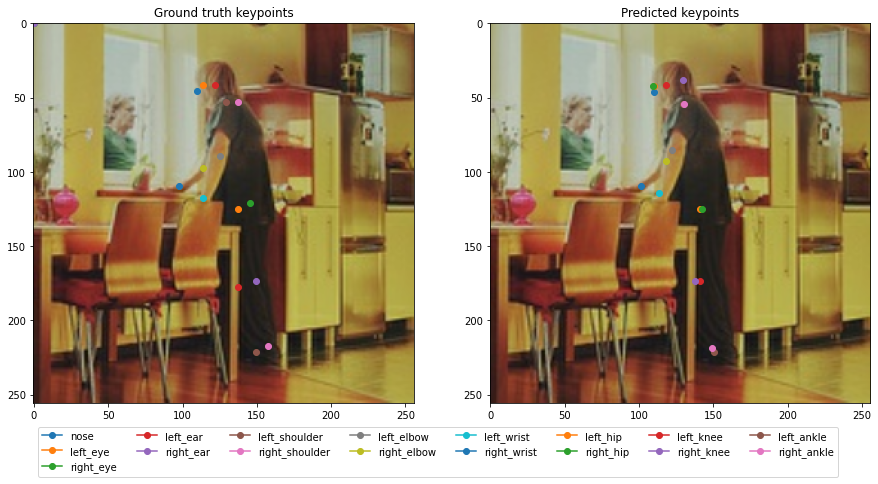

In [ ]:
fig = plt.figure(figsize=(15, 15))
rows = 1
cols = 2
labels = cfg.COCO_KEYPOINT_LABELS

fig.add_subplot(rows, cols, 1)
plt.imshow(img)
for kp, l in zip(gt_keypoints, labels):
  plt.plot(kp[0], kp[1], marker='o', label = l)
  plt.title('Ground truth keypoints')

ax = plt.gca()
ax.legend(loc='upper left', bbox_to_anchor=(00, -0.05), ncol = 8)

fig.add_subplot(rows, cols, 2)
plt.imshow(img)
for kp, l in zip(pred_keypoints, labels):
  plt.plot(kp[0], kp[1], marker='o', label = l)
plt.title('Predicted keypoints')




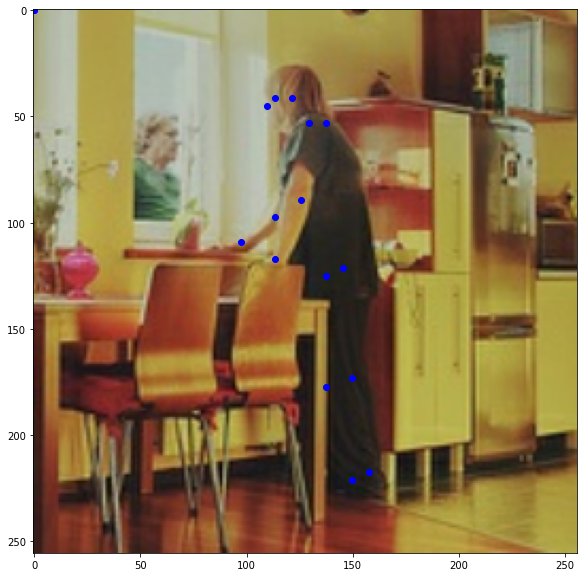

In [ ]:
plt.subplots(figsize=(10, 10))
plt.imshow(img)
plt.scatter(gt_keypoints[:,0], gt_keypoints[:,1], marker='o', color='g', label = 'Groud truth')
plt.scatter(pred_keypoints[:,0], pred_keypoints[:,1], marker='o', color='r', label = 'Predicted')
plt.legend()

In [ ]:
COCO_SKELETON = np.array([
                    [16, 14],
                    [14, 12],
                    [17, 15],
                    [15, 13],
                    [12, 13],
                    [6, 12],
                    [7, 13],
                    [6, 7],
                    [6, 8],
                    [7, 9],
                    [8, 10],
                    [9, 11],
                    [2, 3],
                    [1, 2],
                    [1, 3],
                    [2, 4],
                    [3, 5],
                    [4, 6],
                    [5, 7]]) - 1


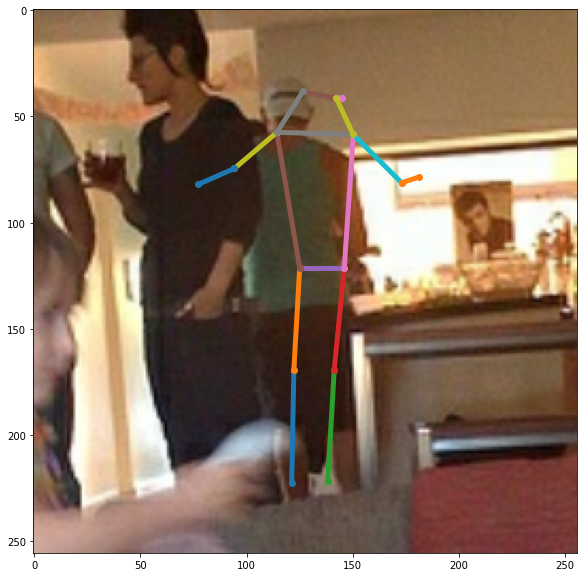

In [ ]:
xmin = pred_keypoints[COCO_SKELETON[:,0]][:,0]
ymin = pred_keypoints[COCO_SKELETON[:,0]][:,1]
xmax = pred_keypoints[COCO_SKELETON[:,1]][:,0]
ymax = pred_keypoints[COCO_SKELETON[:,1]][:,1]

plt.figure(figsize = (10, 10))
plt.imshow(img)
ax = plt.gca()
for x1, y1, x2, y2 in zip(xmin, ymin, xmax, ymax):
  if x1 and y1 and x2 and y2:
    plt.plot([x1, x2], [y1, y2], linewidth = '5', marker= 'o')


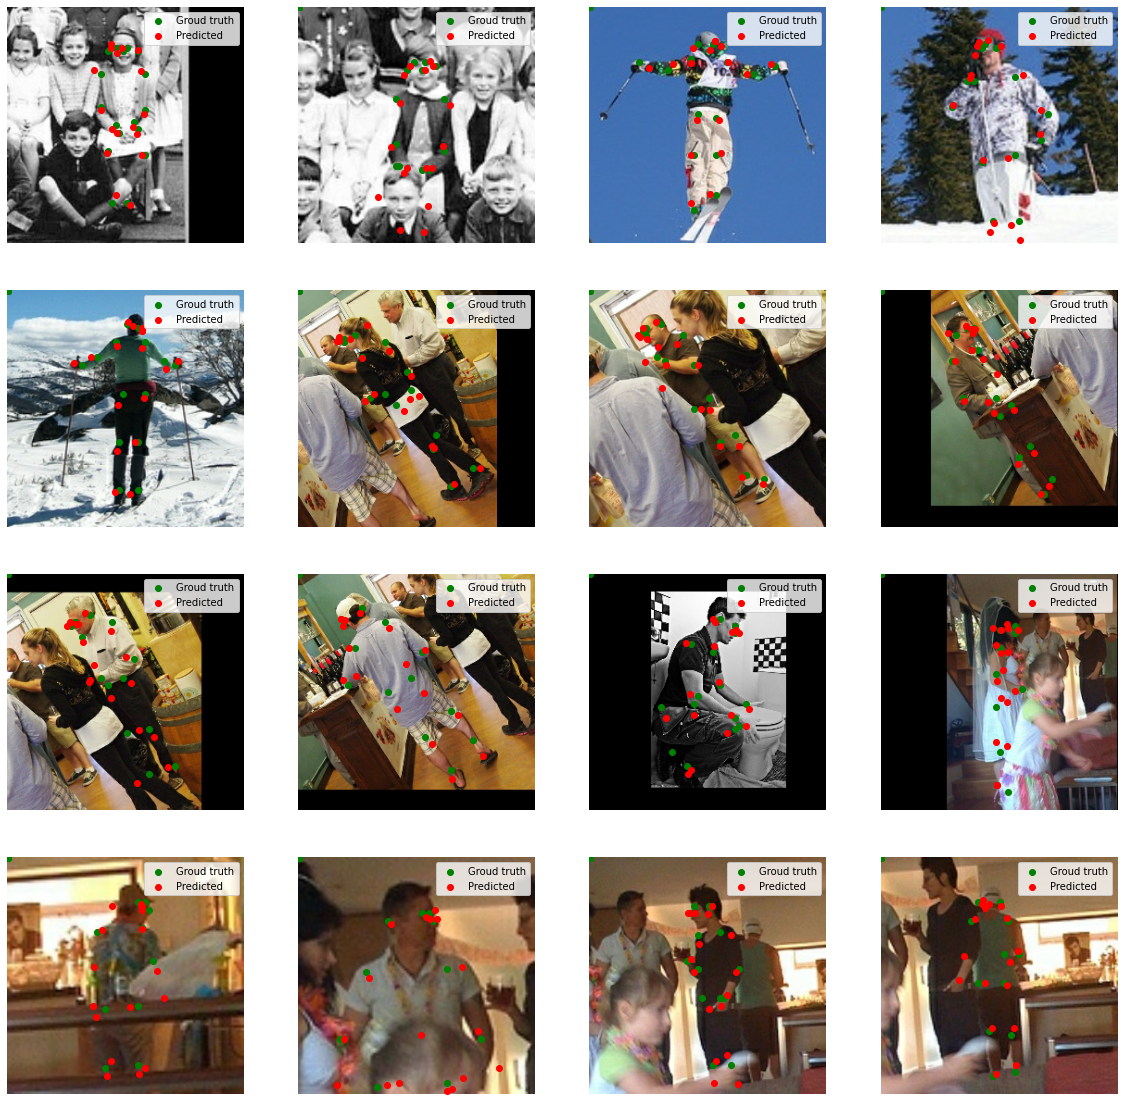

In [ ]:
fig = plt.figure(figsize=(20, 20))
rows = 4
cols = 4
for i in range(rows*cols):
  fig.add_subplot(rows, cols, i+1)
  img = images_batch[i]
  plt.imshow(img)
  gt_keypoints = data_utils.heatmaps_to_keypoints_v2(heatmaps_batch[i].numpy())
  pred_keypoints = data_utils.heatmaps_to_keypoints_v2(pred[-1][i])
  plt.scatter(gt_keypoints[:,0]/64*256, gt_keypoints[:,1]/64*256, marker='o', color='g', label = 'Groud truth')
  plt.scatter(pred_keypoints[:,0]/64*256, pred_keypoints[:,1]/64*256, marker='o', color='r', label = 'Predicted')
  plt.axis('off')
  plt.legend()

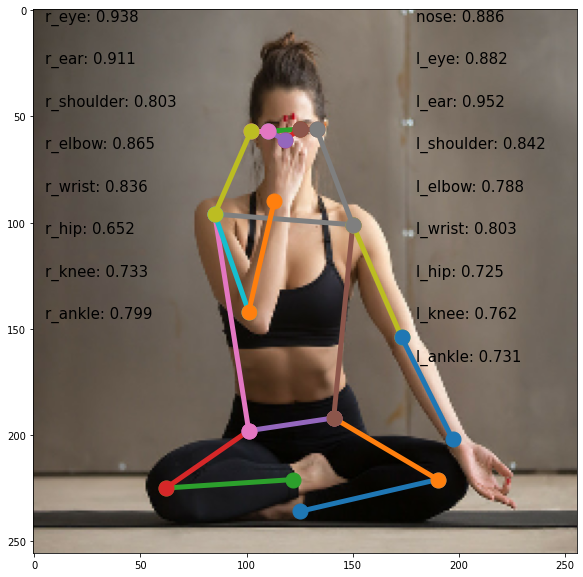

In [26]:
image = tf.io.decode_image(tf.io.read_file("/content/drive/MyDrive/single-person-pose-estimation/demo pics/yoga.jpg"), channels=3, dtype=tf.dtypes.float32)
image = tf.image.resize(image, (256, 256))
image = tf.expand_dims(image, axis = 0)
image.shape
pred = model.predict(image)
pred_keypoints = data_utils.heatmaps_to_keypoints_v2(pred[-1][0], conf_threshold = 0.01)


plt.figure(figsize = (10, 10))
plt.imshow(image[0])
ax = plt.gca()

annoted = [False for i in range(17)]
for bone in cfg.COCO_SKELETON:
  p1 = bone[0]
  p2 = bone[1]

  x1 = pred_keypoints[p1][0]
  y1 = pred_keypoints[p1][1]
  

  x2 = pred_keypoints[p2][0]
  y2 = pred_keypoints[p2][1]

  plt.plot([x1/64*256, x2/64*256], [y1/64*256, y2/64*256], linewidth = '5', marker= 'o', markersize=15)
left = 5
right = 180
step = 20
y1 = 5
y2 = 5
for (kp, label) in zip(pred_keypoints, cfg.COCO_KEYPOINT_LABELS):
  if label.split('_')[0] == 'right':
    n = 'r_' + label.split('_')[1]
    plt.annotate(f'{n}: {kp[2]:.3f}', (left, y1), size = 15, weight = 15)
    y1+=step
  else:
    n = 'nose'
    if label != 'nose':
      n = 'l_' + label.split('_')[1]
    plt.annotate(f'{n}: {kp[2]:.3f}', (right, y2), size = 15,weight = 15)
    y2+=step
  
